In [4]:
import pandas as pd
import matplotlib 

In [288]:
type(pd.read_csv('frauentabelle.csv'))

pandas.core.frame.DataFrame

In [289]:
df_kultur = pd.read_csv('frauentabelle.csv', na_values = 'Does not apply')

In [290]:
df_kultur

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
0,Zentrum Paul Klee (ZPK und Kunstmuseum haben d...,6318000,10500000,40,140000.0,NaN,Nina Zimmer,w,120/14
1,Kunstmuseum Bern,6250000,9500000,34,140000.0,NaN,Nina Zimmer,w,149/0
2,Ballenberg,1225000,8000000,80,210000.0,NaN,Peter Kohler,m,165
3,Alpines Museum,780000,3300000,45,30435.0,NaN,Beat Hächler,m,23/2
4,Schweizer Künstlerbörse,250000,950000,42,3000.0,Dienstleistung des Berufsverbands t. Theatersc...,Anne Jäggi,w,5/60 (+55 auf Mandatsebene)
5,Berner Kammerorchester,44800,300000,70,1400.0,NaN,Beat Sieber,m,34/0
6,Bernisches Historisches Museum,2351333,11000000,25,110952.0,NaN,Jakob Messerli,m,99/0
7,Buskers Bern,40000,800000,über 90,70000.0,NaN,Christine Wyss,w,4/300
8,Camerata,220000,1800000,63,9729.0,NaN,Louis Dupras,m,73/10
9,Theater an der Effingerstrasse,170000,NaN,"75,39",32460.0,NaN,Markus Keller,m,59


# Wie viele rows und columns insgesamt? (54 geöffnete Institutionen)

In [164]:
df_kultur.shape

(57, 9)

In [291]:
df_kultur.dtypes

name                                 object
anteil_kanton_pro_jahr_2016-2020     object
budget                               object
selbstfinanzierungsgrad_prozent      object
besucherstatistik                   float64
leitungsstruktur                     object
leitung_operativ_name                object
leitung_operativ_geschlecht          object
mitarbeiter_bezahlt_unbezahlt        object
dtype: object

## Ich schmeisse Schloss Burgdorf raus, weil es zu ist 

In [273]:
df_k = df_kultur.drop(df_kultur.index[31])

In [274]:
df_k.shape

(56, 9)

# Auswertung 

## 1.) Wie viele Frauen als CEOs, wie viele Männer?

In [168]:
df_k.leitung_operativ_geschlecht.value_counts()

m    27
w    27
Name: leitung_operativ_geschlecht, dtype: int64

### In Prozent

In [169]:
df_k.leitung_operativ_geschlecht.value_counts(normalize=True) * 100

m    50.0
w    50.0
Name: leitung_operativ_geschlecht, dtype: float64

## 2.) Welches sind die Top 10 mit dem grössten Budget?

In [171]:
df_k.dtypes

name                                 object
anteil_kanton_pro_jahr_2016-2020     object
budget                               object
selbstfinanzierungsgrad_prozent      object
besucherstatistik                   float64
leitungsstruktur                     object
leitung_operativ_name                object
leitung_operativ_geschlecht          object
mitarbeiter_bezahlt_unbezahlt        object
dtype: object

In [292]:
df_k.budget.astype(float)

0     10500000.0
1      9500000.0
2      8000000.0
3      3300000.0
4       950000.0
5       300000.0
6     11000000.0
7       800000.0
8      1800000.0
9            NaN
10    48000000.0
11     8500000.0
12      950000.0
13           NaN
14       60000.0
15      450000.0
16           NaN
17      750000.0
18    15200000.0
19     3000000.0
20     2180000.0
21     1500000.0
22     1500000.0
23      300000.0
24      385000.0
25      350000.0
26     2000000.0
27           NaN
28       60000.0
29      571420.0
30      812000.0
32      411900.0
33      323000.0
34     2100000.0
35      450000.0
36      769850.0
37      144430.0
38           NaN
39      350000.0
40      580000.0
41      350000.0
42      115000.0
43     1600000.0
44     1000000.0
45      300000.0
46           NaN
47           NaN
48     2112570.0
49           NaN
50      450000.0
51      200000.0
52     7200000.0
53     1000000.0
54           NaN
Name: budget, dtype: float64

In [293]:
df_k['budget'] = df_k.budget.astype(float)

In [294]:
df_k.dtypes

name                                 object
anteil_kanton_pro_jahr_2016-2020     object
budget                              float64
selbstfinanzierungsgrad_prozent      object
besucherstatistik                   float64
leitungsstruktur                     object
leitung_operativ_name                object
leitung_operativ_geschlecht          object
mitarbeiter_bezahlt_unbezahlt        object
dtype: object

In [278]:
df_k.sort_values(by='budget', ascending=False).head(10)

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
10,Konzert Theater Bern,15192500,48000000.0,"19,6",140000.0,NaN,Anton Stocker (a.i.),m,555
18,Theater Biel/Solothurn TOBS,3194203,15200000.0,"24,3",60948.0,NaN,Dieter Kaegi,m,210/70
6,Bernisches Historisches Museum,2351333,11000000.0,25,110952.0,NaN,Jakob Messerli,m,99/0
0,Zentrum Paul Klee (ZPK und Kunstmuseum haben d...,6318000,10500000.0,40,140000.0,NaN,Nina Zimmer,w,120/14
1,Kunstmuseum Bern,6250000,9500000.0,34,140000.0,NaN,Nina Zimmer,w,149/0
11,Kornhausbibliotheken,600000,8500000.0,15,666575.0,"Stiftungsrat (3 Männer, 2 Frauen) Strategieebe...",Christine Eggenberg,w,100/0
2,Ballenberg,1225000,8000000.0,80,210000.0,NaN,Peter Kohler,m,165
52,Menuhin Festival Gstaad,160800,7200000.0,85,28000.0,NaN,Christoph Müller,m,12/50
3,Alpines Museum,780000,3300000.0,45,30435.0,NaN,Beat Hächler,m,23/2
19,Bibliothek Biel,570595,3000000.0,15,250000.0,NaN,Clemens Moser,m,30/9


In [176]:
df_k.sort_values(by='budget', ascending=False).head(20)

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
10,Konzert Theater Bern,15192500,48000000.0,"19,6",140000.0,NaN,Anton Stocker (a.i.),m,555
18,Theater Biel/Solothurn TOBS,3194203,15200000.0,"24,3",60948.0,NaN,Dieter Kaegi,m,210/70
6,Bernisches Historisches Museum,2351333,11000000.0,25,110952.0,NaN,Jakob Messerli,m,99/0
0,Zentrum Paul Klee (ZPK und Kunstmuseum haben d...,6318000,10500000.0,40,140000.0,NaN,Nina Zimmer,w,120/14
1,Kunstmuseum Bern,6250000,9500000.0,34,140000.0,NaN,Nina Zimmer,w,149/0
11,Kornhausbibliotheken,600000,8500000.0,15,666575.0,"Stiftungsrat (3 Männer, 2 Frauen) Strategieebe...",Christine Eggenberg,w,100/0
2,Ballenberg,1225000,8000000.0,80,210000.0,NaN,Peter Kohler,m,165
52,Menuhin Festival Gstaad,160800,7200000.0,85,28000.0,NaN,Christoph Müller,m,12/50
3,Alpines Museum,780000,3300000.0,45,30435.0,NaN,Beat Hächler,m,23/2
19,Bibliothek Biel,570595,3000000.0,15,250000.0,NaN,Clemens Moser,m,30/9


## Top 20 mit dem grössten Budget (neuer df für top20)

In [177]:
df_ktop20 = df_k.sort_values(by='budget', ascending=False).head(20)
df_ktop20.head(20)

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
10,Konzert Theater Bern,15192500,48000000.0,"19,6",140000.0,NaN,Anton Stocker (a.i.),m,555
18,Theater Biel/Solothurn TOBS,3194203,15200000.0,"24,3",60948.0,NaN,Dieter Kaegi,m,210/70
6,Bernisches Historisches Museum,2351333,11000000.0,25,110952.0,NaN,Jakob Messerli,m,99/0
0,Zentrum Paul Klee (ZPK und Kunstmuseum haben d...,6318000,10500000.0,40,140000.0,NaN,Nina Zimmer,w,120/14
1,Kunstmuseum Bern,6250000,9500000.0,34,140000.0,NaN,Nina Zimmer,w,149/0
11,Kornhausbibliotheken,600000,8500000.0,15,666575.0,"Stiftungsrat (3 Männer, 2 Frauen) Strategieebe...",Christine Eggenberg,w,100/0
2,Ballenberg,1225000,8000000.0,80,210000.0,NaN,Peter Kohler,m,165
52,Menuhin Festival Gstaad,160800,7200000.0,85,28000.0,NaN,Christoph Müller,m,12/50
3,Alpines Museum,780000,3300000.0,45,30435.0,NaN,Beat Hächler,m,23/2
19,Bibliothek Biel,570595,3000000.0,15,250000.0,NaN,Clemens Moser,m,30/9


### Neuer df für top10 

In [178]:
df_ktop10 = df_k.sort_values(by='budget', ascending=False).head(10)

In [179]:
df_ktop10.head(10)

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
10,Konzert Theater Bern,15192500,48000000.0,"19,6",140000.0,NaN,Anton Stocker (a.i.),m,555
18,Theater Biel/Solothurn TOBS,3194203,15200000.0,"24,3",60948.0,NaN,Dieter Kaegi,m,210/70
6,Bernisches Historisches Museum,2351333,11000000.0,25,110952.0,NaN,Jakob Messerli,m,99/0
0,Zentrum Paul Klee (ZPK und Kunstmuseum haben d...,6318000,10500000.0,40,140000.0,NaN,Nina Zimmer,w,120/14
1,Kunstmuseum Bern,6250000,9500000.0,34,140000.0,NaN,Nina Zimmer,w,149/0
11,Kornhausbibliotheken,600000,8500000.0,15,666575.0,"Stiftungsrat (3 Männer, 2 Frauen) Strategieebe...",Christine Eggenberg,w,100/0
2,Ballenberg,1225000,8000000.0,80,210000.0,NaN,Peter Kohler,m,165
52,Menuhin Festival Gstaad,160800,7200000.0,85,28000.0,NaN,Christoph Müller,m,12/50
3,Alpines Museum,780000,3300000.0,45,30435.0,NaN,Beat Hächler,m,23/2
19,Bibliothek Biel,570595,3000000.0,15,250000.0,NaN,Clemens Moser,m,30/9


## 2.1) Frauenanteil hier top10: total und in Prozent 

In [180]:
df_ktop10.leitung_operativ_geschlecht.value_counts()

m    7
w    3
Name: leitung_operativ_geschlecht, dtype: int64

In [181]:
df_ktop10.leitung_operativ_geschlecht.value_counts(normalize=True) * 100

m    70.0
w    30.0
Name: leitung_operativ_geschlecht, dtype: float64

## 2.2) Frauenanteil top20: total und in Prozent 

In [182]:
df_ktop20.leitung_operativ_geschlecht.value_counts()

m    10
w    10
Name: leitung_operativ_geschlecht, dtype: int64

In [183]:
df_ktop20.leitung_operativ_geschlecht.value_counts(normalize=True) * 100

m    50.0
w    50.0
Name: leitung_operativ_geschlecht, dtype: float64

### Meine (rasche) Erkenntnis hier:  Je höher das Budget (je grösser die Institution), desto kleiner der Frauenanteil.

## 3) Top 10 der vom Kanton am stärksten unterstützten Institutionen

### Drop last row because of strings and % 

In [279]:
df_k.tail()

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
52,Menuhin Festival Gstaad,160800,7200000.0,85,28000.0,NaN,Christoph Müller,m,12/50
53,Sommets Musicaux Gstaad,32000,1000000.0,85,3750.0,NaN,Ombretta Ravessoud,w,6/0
54,Jazz Tage Lenk,18000,NaN,NaN,NaN,NaN,Georg Nellen,m,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,Anteil Kanton bei Inst. reg. Bedeutung: 40 % (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping various rows (Schloss Burgdorf an NaN) 

In [295]:
df_k = df_kultur.drop(df_kultur.index[[31,55,56]])
df_k.tail()

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
50,Bibliothek Spiez,57945,450000,34,50600.0,"Vorstand, Betriebsleitung",Brigitte Burri,w,7/viele
51,"Swiss Chamber Music Festival, Adelboden",16000,200000,22,1035.0,"Verein, Geschäftsführung",Christine Lüthi,w,nur Geschäftsführerin bezahlt
52,Menuhin Festival Gstaad,160800,7200000,85,28000.0,NaN,Christoph Müller,m,12/50
53,Sommets Musicaux Gstaad,32000,1000000,85,3750.0,NaN,Ombretta Ravessoud,w,6/0
54,Jazz Tage Lenk,18000,NaN,NaN,NaN,NaN,Georg Nellen,m,NaN


In [296]:
df_k.shape

(54, 9)

### convert dtype to float 

In [297]:
df_k['anteil_kanton_pro_jahr_2016-2020'] = df_k['anteil_kanton_pro_jahr_2016-2020'].astype(float)

In [188]:
df_k.sort_values(by='selbstfinanzierungsgrad_prozent', ascending=False)

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
7,Buskers Bern,40000.0,800000,über 90,70000.0,NaN,Christine Wyss,w,4/300
16,Mühle Hunziken,14000.0,NaN,weitgehend selbstfinanziert,NaN,NaN,Christoph Fankhauser,m,NaN
26,Festival du Film Francais dHelvetie,61160.0,2000000,90,17000.0,NaN,Christian Kellenberger,m,NaN
53,Sommets Musicaux Gstaad,32000.0,1000000,85,3750.0,NaN,Ombretta Ravessoud,w,6/0
52,Menuhin Festival Gstaad,160800.0,7200000,85,28000.0,NaN,Christoph Müller,m,12/50
41,Musikfestwoche Meiringen,19600.0,350000,82,3500.0,"Verein, Geschäftsführung, künstl. Leitung",Katja Demenga,w,2/8
13,La Cappella,60000.0,NaN,80,18600.0,NaN,Christoph Hoigné,m,NaN
27,Kufa Lyss,64000.0,NaN,80,33172.0,Vereinsvorstand stellt Leitungsteam an,Daniela Eicher-Hulliger,w,8/150
2,Ballenberg,1225000.0,8000000,80,210000.0,NaN,Peter Kohler,m,165
9,Theater an der Effingerstrasse,170000.0,NaN,"75,39",32460.0,NaN,Markus Keller,m,59


### Neuer df für Finanzierungsgrad 

In [189]:
df_kfinanzierungsgrad = df_k.sort_values(by='selbstfinanzierungsgrad_prozent', ascending=False)
df_kfinanzierungsgrad

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
7,Buskers Bern,40000.0,800000,über 90,70000.0,NaN,Christine Wyss,w,4/300
16,Mühle Hunziken,14000.0,NaN,weitgehend selbstfinanziert,NaN,NaN,Christoph Fankhauser,m,NaN
26,Festival du Film Francais dHelvetie,61160.0,2000000,90,17000.0,NaN,Christian Kellenberger,m,NaN
53,Sommets Musicaux Gstaad,32000.0,1000000,85,3750.0,NaN,Ombretta Ravessoud,w,6/0
52,Menuhin Festival Gstaad,160800.0,7200000,85,28000.0,NaN,Christoph Müller,m,12/50
41,Musikfestwoche Meiringen,19600.0,350000,82,3500.0,"Verein, Geschäftsführung, künstl. Leitung",Katja Demenga,w,2/8
13,La Cappella,60000.0,NaN,80,18600.0,NaN,Christoph Hoigné,m,NaN
27,Kufa Lyss,64000.0,NaN,80,33172.0,Vereinsvorstand stellt Leitungsteam an,Daniela Eicher-Hulliger,w,8/150
2,Ballenberg,1225000.0,8000000,80,210000.0,NaN,Peter Kohler,m,165
9,Theater an der Effingerstrasse,170000.0,NaN,"75,39",32460.0,NaN,Markus Keller,m,59


In [209]:
df_kfinanzierungsgrad = df_kfinanzierungsgrad.drop(df_kfinanzierungsgrad.index[31])
df_kfinanzierungsgrad.head(20)

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
7,Buskers Bern,40000.0,800000,über 90,70000.0,NaN,Christine Wyss,w,4/300
16,Mühle Hunziken,14000.0,NaN,weitgehend selbstfinanziert,NaN,NaN,Christoph Fankhauser,m,NaN
26,Festival du Film Francais dHelvetie,61160.0,2000000,90,17000.0,NaN,Christian Kellenberger,m,NaN
53,Sommets Musicaux Gstaad,32000.0,1000000,85,3750.0,NaN,Ombretta Ravessoud,w,6/0
52,Menuhin Festival Gstaad,160800.0,7200000,85,28000.0,NaN,Christoph Müller,m,12/50
41,Musikfestwoche Meiringen,19600.0,350000,82,3500.0,"Verein, Geschäftsführung, künstl. Leitung",Katja Demenga,w,2/8
13,La Cappella,60000.0,NaN,80,18600.0,NaN,Christoph Hoigné,m,NaN
27,Kufa Lyss,64000.0,NaN,80,33172.0,Vereinsvorstand stellt Leitungsteam an,Daniela Eicher-Hulliger,w,8/150
2,Ballenberg,1225000.0,8000000,80,210000.0,NaN,Peter Kohler,m,165
9,Theater an der Effingerstrasse,170000.0,NaN,"75,39",32460.0,NaN,Markus Keller,m,59


## 3.1) Blick auf top20 um zu sehen, ob es einen Zusammenhang zw. Finanzierungsgrad und Frauenanteil gibt 

In [191]:
df_kfinanzierungsgrad.head(20).leitung_operativ_geschlecht.value_counts()

m    16
w     4
Name: leitung_operativ_geschlecht, dtype: int64

In [192]:
df_kfinanzierungsgrad.head(20).leitung_operativ_geschlecht.value_counts(normalize=True) * 100

m    80.0
w    20.0
Name: leitung_operativ_geschlecht, dtype: float64

### Erkenntnis: Unter den 20 Institutionen mit dem höchsten Eigenfinanzierungsgrad beträgt der Frauenanteil gerade mal 20 Prozent. 

### Gegencheck: Frauenanteil bei den 20 Insitutionen mit der höchsten Finanzierungsquote durch den Kanton: 

In [193]:
df_kfinanzierungsgrad.tail(20)

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
6,Bernisches Historisches Museum,2351333.0,11000000,25,110952.0,NaN,Jakob Messerli,m,99/0
18,Theater Biel/Solothurn TOBS,3194203.0,15200000,"24,3",60948.0,NaN,Dieter Kaegi,m,210/70
51,"Swiss Chamber Music Festival, Adelboden",16000.0,200000,22,1035.0,"Verein, Geschäftsführung",Christine Lüthi,w,nur Geschäftsführerin bezahlt
23,Photoforum pasquart,98600.0,300000,20,12439.0,NaN,Danaé Panchaud,w,2//
12,Kornhausforum,304000.0,950000,20,35438.0,NaN,Bernhard Giger,m,8
32,Regionalbibliothek Langnau,53000.0,411900,20,45469.0,NaN,Barbara Dürst,w,4/0
10,Konzert Theater Bern,15192500.0,48000000,"19,6",140000.0,NaN,Anton Stocker (a.i.),m,555
20,Neues Museum Biel,765000.0,2180000,18,17000.0,Strategisch: Stiftungsrat / Operativ: Museum,Bernadette Walter,w,21 / 1
36,Bibliothek Langenthal,132600.0,769850,17,74936.0,Stadtbetrieb und operative Führung,Monika Hirsbrunner,w,7
19,Bibliothek Biel,570595.0,3000000,15,250000.0,NaN,Clemens Moser,m,30/9


In [194]:
df_kfinanzierungsgrad.tail(20).leitung_operativ_geschlecht.value_counts()

w    13
m     7
Name: leitung_operativ_geschlecht, dtype: int64

In [195]:
df_kfinanzierungsgrad.tail(20).leitung_operativ_geschlecht.value_counts(normalize=True) * 100

w    65.0
m    35.0
Name: leitung_operativ_geschlecht, dtype: float64

### Erkenntnis (obwohl nicht alle den Eigenfinanzierungsgrad ausweisen, siehe NaN): Unter den Top 20 der Fremdfinanzierten ist der Frauenanteil mit 65 Prozent am höchsten.

## Bei Top 10 Selbstfinanzierte 

In [210]:
df_kfinanzierungsgrad.head(10).leitung_operativ_geschlecht.value_counts()

m    6
w    4
Name: leitung_operativ_geschlecht, dtype: int64

In [212]:
df_kfinanzierungsgrad.head(10).leitung_operativ_geschlecht.value_counts(normalize=True) * 100

m    60.0
w    40.0
Name: leitung_operativ_geschlecht, dtype: float64

# 4.) Frauenanteil bei den am meisten  besuchten Institutionen

In [196]:
df_k.besucherstatistik.dtypes

dtype('float64')

In [197]:
df_k.sort_values(by='besucherstatistik', ascending=False)

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
11,Kornhausbibliotheken,600000.0,8500000,15,666575.0,"Stiftungsrat (3 Männer, 2 Frauen) Strategieebe...",Christine Eggenberg,w,100/0
19,Bibliothek Biel,570595.0,3000000,15,250000.0,NaN,Clemens Moser,m,30/9
2,Ballenberg,1225000.0,8000000,80,210000.0,NaN,Peter Kohler,m,165
0,Zentrum Paul Klee (ZPK und Kunstmuseum haben d...,6318000.0,10500000,40,140000.0,NaN,Nina Zimmer,w,120/14
1,Kunstmuseum Bern,6250000.0,9500000,34,140000.0,NaN,Nina Zimmer,w,149/0
10,Konzert Theater Bern,15192500.0,48000000,"19,6",140000.0,NaN,Anton Stocker (a.i.),m,555
44,Stadtbibliothek Thun,156800.0,1000000,20,114000.0,NaN,Jeanne Froidevaux Müller,w,9/25
6,Bernisches Historisches Museum,2351333.0,11000000,25,110952.0,NaN,Jakob Messerli,m,99/0
36,Bibliothek Langenthal,132600.0,769850,17,74936.0,Stadtbetrieb und operative Führung,Monika Hirsbrunner,w,7
7,Buskers Bern,40000.0,800000,über 90,70000.0,NaN,Christine Wyss,w,4/300


## Frauenanteil bei top10 der meist besuchten Institutionen 

In [198]:
#Neuer df für Besucherstatistik:
df_kbesucher = df_k.sort_values(by='besucherstatistik', ascending=False)
df_kbesucher.head()

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
11,Kornhausbibliotheken,600000.0,8500000,15,666575.0,"Stiftungsrat (3 Männer, 2 Frauen) Strategieebe...",Christine Eggenberg,w,100/0
19,Bibliothek Biel,570595.0,3000000,15,250000.0,NaN,Clemens Moser,m,30/9
2,Ballenberg,1225000.0,8000000,80,210000.0,NaN,Peter Kohler,m,165
0,Zentrum Paul Klee (ZPK und Kunstmuseum haben d...,6318000.0,10500000,40,140000.0,NaN,Nina Zimmer,w,120/14
1,Kunstmuseum Bern,6250000.0,9500000,34,140000.0,NaN,Nina Zimmer,w,149/0


In [199]:
df_kbesucher.head(10).leitung_operativ_geschlecht.value_counts()

w    6
m    4
Name: leitung_operativ_geschlecht, dtype: int64

In [200]:
#In Prozent:
df_kbesucher.head(10).leitung_operativ_geschlecht.value_counts(normalize=True) * 100

w    60.0
m    40.0
Name: leitung_operativ_geschlecht, dtype: float64

## Frauenanteil top20 

In [201]:
df_kbesucher.head(20).leitung_operativ_geschlecht.value_counts()

m    10
w    10
Name: leitung_operativ_geschlecht, dtype: int64

### Erkenntnis: Keine. Kein wirklicher Zusammenhang zwischen Besucherzahl und CEO-Geschlecht 

### Eine Untersuchung, ob es einen Zusammenhang zw. Mitarbeitendenzahl und Frauenanteil CEO gibt, macht keinen Sinn (Datenlage zu unvollständig) 

# Fazit:
### Erkenntnis 1: Schaut man einfach alle 54 Institutionen im Kanton Bern an, dann ist das Verhältnis Frauen - Männer in der Geschäftsleitung bei rekordhohen 50 Prozent.

### Erkenntnis 2: 
Unter den Top 20 mit dem grössten Budget ist der Frauenanteil ebenfalls noch 50 Prozent. Unter den Top 10 der budgetstärksten aber nur noch 30 Prozent. Je höher also das Budget der Institution, desto mehr nimmt der Frauenanteil in der Geschäftsleitung ab.

### Erkenntnis 3: 
Unter den Top 20 mit dem höchsten Eigenfinanzierungsgrad beträgt der Frauenanteil nur noch 20 Prozent (aber Achtung: unter den Top 10 beträgt er 40 Prozent). Unter den Top 20 derjenigen, die am meisten finanzielle Unterstützung erhalten, beträgt der Frauenanteil in der Geschäftsleitung 65 Prozent. Hier müsste man beim den Förderern und den Instituten nachfragen, ob sie für die stark unterstützten Institutionen Einstellungskriterien formuliert. 

These hierzu: Je höher der Fremdfinanzierungsgrad, desto weniger kommerziell sind die Institute - und desto höher ist deshalb der Frauenanteil.

### Erkenntnis 4: 
Einen Zusammenhang herzustellen zwischen dem Frauenanteil Leitung und den Besucherzahlen ist schwierig. bei den Top 10 der meistbesuchten beträgt der Frauenanteil 60 Prozent. Bei den Top 20 hingegen 50 Prozent.

# Grobe Visualisierung Erkenntnisse

In [234]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline
matp.style.use('fivethirtyeight')
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)>

In [232]:
totalprozent = df_k.leitung_operativ_geschlecht.value_counts(normalize=True) * 100
totalprozent

m    50.0
w    50.0
Name: leitung_operativ_geschlecht, dtype: float64

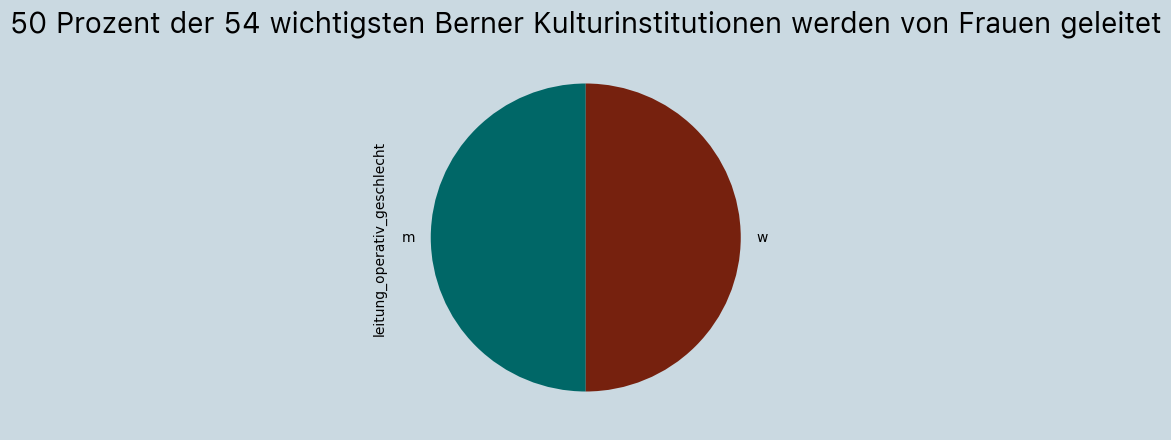

In [250]:
ax = totalprozent.plot(x='state', kind='pie', figsize=(5,5), startangle=90)

ax.set_title("50 Prozent der 54 wichtigsten Berner Kulturinstitutionen werden von Frauen geleitet", pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname(".Keyboard")

# CUSTOMIZATION CODE GOES UNDER HERE
plt.rcdefaults()
plt.rcParams.update({
    "figure.facecolor": "#cad9e1",
              "axes.facecolor": "#cad9e1",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
            "axes.axisbelow": True,
              "grid.color"    : "#ffffff",
              "grid.linewidth": 2,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#006767', '#76210E', '#2ca02c', '#d62728',
                                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                     '#bcbd22', '#17becf']),
    
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})


In [259]:
frauenanteilbudget_top10 = df_ktop10.leitung_operativ_geschlecht.value_counts()
frauenanteilbudget_top10

m    7
w    3
Name: leitung_operativ_geschlecht, dtype: int64

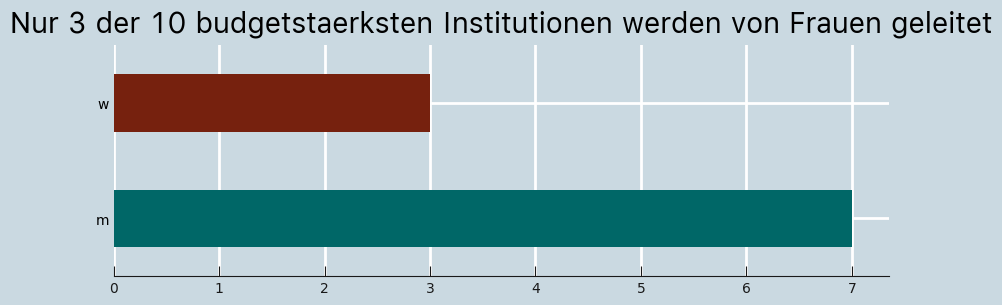

In [262]:
ax = frauenanteilbudget_top10.plot(x='state', kind='barh', figsize=(10,3))

ax.set_title("Nur 3 der 10 budgetstaerksten Institutionen werden von Frauen geleitet", pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname(".Keyboard")


# CUSTOMIZATION CODE GOES UNDER HERE
plt.rcdefaults()
plt.rcParams.update({
    "figure.facecolor": "#cad9e1",
              "axes.facecolor": "#cad9e1",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
            "axes.axisbelow": True,
              "grid.color"    : "#ffffff",
              "grid.linewidth": 2,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#006767', '#76210E', '#2ca02c', '#d62728',
                                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                     '#bcbd22', '#17becf']),
    
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})


In [267]:
df_k.head()

,name,anteil_kanton_pro_jahr_2016-2020,budget,selbstfinanzierungsgrad_prozent,besucherstatistik,leitungsstruktur,leitung_operativ_name,leitung_operativ_geschlecht,mitarbeiter_bezahlt_unbezahlt
0,Zentrum Paul Klee (ZPK und Kunstmuseum haben d...,6318000.0,10500000,40,140000.0,NaN,Nina Zimmer,w,120/14
1,Kunstmuseum Bern,6250000.0,9500000,34,140000.0,NaN,Nina Zimmer,w,149/0
2,Ballenberg,1225000.0,8000000,80,210000.0,NaN,Peter Kohler,m,165
3,Alpines Museum,780000.0,3300000,45,30435.0,NaN,Beat Hächler,m,23/2
4,Schweizer Künstlerbörse,250000.0,950000,42,3000.0,Dienstleistung des Berufsverbands t. Theatersc...,Anne Jäggi,w,5/60 (+55 auf Mandatsebene)


In [287]:
df_k.dtypes

name                                 object
anteil_kanton_pro_jahr_2016-2020     object
budget                              float64
selbstfinanzierungsgrad_prozent      object
besucherstatistik                   float64
leitungsstruktur                     object
leitung_operativ_name                object
leitung_operativ_geschlecht          object
mitarbeiter_bezahlt_unbezahlt        object
dtype: object

In [299]:
fremdfinanzierte_top20 = df_kfinanzierungsgrad.tail(20).leitung_operativ_geschlecht.value_counts()
fremdfinanzierte_top20

w    14
m     6
Name: leitung_operativ_geschlecht, dtype: int64

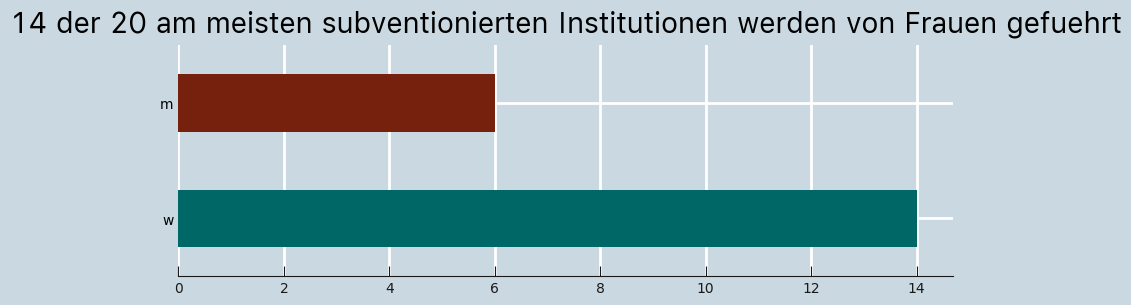

In [302]:
ax = fremdfinanzierte_top20.plot(x='state', kind='barh', figsize=(10,3))

ax.set_title("14 der 20 am meisten subventionierten Institutionen werden von Frauen gefuehrt", pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname(".Keyboard")


# CUSTOMIZATION CODE GOES UNDER HERE
plt.rcdefaults()
plt.rcParams.update({
    "figure.facecolor": "#cad9e1",
              "axes.facecolor": "#cad9e1",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
            "axes.axisbelow": True,
              "grid.color"    : "#ffffff",
              "grid.linewidth": 2,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#006767', '#76210E', '#2ca02c', '#d62728',
                                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                     '#bcbd22', '#17becf']),
    
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})
